# Q1 - Word Classification

## Q1.1. Implement the Evaluation Metrics

The most common metrics for evaluating binary classification are precision, recall, and f-score. In our case, complex words are considered positive examples, and simple words are considered negative examples. In this part, we implement these metrics. 

First, we implement get_precision(y_pred, y_true)<br>
Intuitively, precision is the ability of the classifier not to label as positive a sample that is negative.

In [1]:
import math
from collections import defaultdict
import gzip
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB



training_file = "data/complex_words_training.txt"
development_file = "data/complex_words_development.txt"
test_file = "data/complex_words_test_unlabeled.txt"
counts_file = "data/ngram_counts.txt.gz"

## Loads in the words and labels of one of the datasets
def load_file(data_file):
    words = []
    labels = []   
    with open(data_file, 'rt', encoding="utf8") as f:
        i = 0
        for line in f:
            if i > 0:
                line_split = line[:-1].split("\t")
                words.append(line_split[0].lower())
                labels.append(int(line_split[1]))
            i += 1
    return words, labels

## Calculates the precision of the predicted labels
def get_precision(y_pred, y_true):
    tp = 0
    fp = 0
    for i in range(len(y_pred)):
        if y_pred[i] == 1:
            if y_true[i] == 1:
                tp += 1
            else:
                fp += 1
    if tp == 0:
        return 0
    else:
        return tp/(fp+tp)

Second, we implement the recall, which measures the ability of the classifier to find all the positive samples.

In [2]:
## Calculates the recall of the predicted labels
def get_recall(y_pred, y_true):
    tp = 0
    fn = 0
    for i in range(len(y_pred)):
        if y_true[i] == 1:
            if y_pred[i] == 1:
                tp += 1
            else:
                fn += 1
    if tp == 0:
        return 0
    else:
        return tp/(fn+tp)

Finally, the fscore:

In [3]:
## Calculates the f-score of the predicted labels
def get_fscore(y_pred, y_true):
    precision = get_precision(y_pred,y_true)
    recall = get_recall(y_pred,y_true)
    if precision == 0 or recall == 0:
        fscore = 0
    else:
        fscore =2 * (precision * recall) / (precision + recall)
    return fscore


Now, let's test our metrics:

In [4]:
def test_predictions(y_pred, y_true):
    precision = get_precision(y_pred, y_true)
    recall = get_recall(y_pred, y_true)
    f1 = get_fscore(y_pred, y_true)

    print("the precision is: " + str(precision))
    print("the recall is: " + str(recall))
    print("the fscore is: " + str(f1))
    
y_true = [0,0,1,0,1,1,0]
y_pred = [0,1,1,0,1,0,1]
test_predictions(y_pred,y_true)

the precision is: 0.5
the recall is: 0.6666666666666666
the fscore is: 0.5714285714285715


## Q1.2. Baselines

We now implement some baselines and measure their performance.

### 1.2.1 Majority Class Baseline

The ajority class baseline labels each word in the dataset as complex. We implement the function all_complex(data_file), that takes in a dataset and returns out the precision, recall, and f-score.

In [5]:

def all_complex(data_file):
    words, y_true = load_file(data_file)
    y_pred = [1 for i in range(len(y_true))]
    precision = get_precision(y_pred,y_true)
    recall = get_recall(y_pred,y_true)
    fscore = get_fscore(y_pred,y_true)
    performance = [precision, recall, fscore]
    return performance



results = all_complex(training_file)
precision = results[0]
recall = results[1]
fscore = results[2]
print("precision=" + str(precision) + ", recall = " + str(recall) + ", fscore = "+ str(fscore))

precision=0.43275, recall = 1.0, fscore = 0.604083057058105


The recall is 1.0, as expected, since the each word is labeled as complex, so we don't miss any complex word. 
On the other hand, the precision=0.43275 is the relation $\frac{complex}{complex+simple}$

### 1.2.2 Word Length Baseline

Now, we'll use the length of each word to predict its complexity. If we set a threshold of i, it means that any word with less than 9 characters will be labeled simple, and any word with 9 characters or more will be labeled complex. We implement  the function word_length_threshold(training_file, development_file). This function takes in both the training and development data files, and returns out the precision, recall, and f-score for your best threshold’s performance on both the training and development data.


In [6]:
## Finds the best length threshold by f-score, and uses this threshold to
## classify the training and development set
def word_length_threshold(training_file, development_file):
    words,labels = load_file(training_file)
    max_len = max([len(w) for w in words])
    fst, pret, rect = get_length_performance(training_file,max_len)
    fsd, pred, recd = get_length_performance(development_file,max_len)
    best_train = fst.index(max(fst))
    best_dev = fsd.index(max(fsd))

    print("the best threshold for the train is: " + str(best_train))
    print("the best threshold for the dev is: " + str(best_dev))

    training_performance = [pret[best_train], rect[best_train], fst[best_train]]
    development_performance = [pred[best_dev], recd[best_dev], fsd[best_dev]]
    return training_performance, development_performance


def get_length_performance(data_file, maxvalue):
    words, y_true = load_file(data_file)
    fscores = []
    precisions =[]
    recalls = []
    for i in range(maxvalue):
        y_pred = length_baseline(i, words)
        fscore_i = get_fscore(y_pred, y_true)
        precision_i = get_precision(y_pred, y_true)
        recall_i = get_recall(y_pred,y_true)
        fscores.append(fscore_i)
        precisions.append(precision_i)
        recalls.append(recall_i)
    return fscores,precisions,recalls


def length_baseline(i, words):
    ty_pred = []
    for j in range(len(words)):
        if len(words[j]) > i:
            ty_pred.append(1)
        else:
            ty_pred.append(0)
    return ty_pred



Now, we'll run word_length_threshold(training_file, development_file) on the trainig and dev data files:

In [7]:
def print_results(results):
    print("-"*50 +"training results" + "-"*50)
    precision = results[0][0]
    recall = results[0][1]
    fscore = results[0][2]
    print("precision=" + str(precision) + ", recall = " + str(recall) + ", fscore = " + str(fscore))
    print("-"*50 +"dev results" + "-"*50)
    precision = results[1][0]
    recall = results[1][1]
    fscore = results[1][2]
    print("precision=" + str(precision) + ", recall = " + str(recall) + ", fscore = " + str(fscore))
    
results = word_length_threshold(training_file,development_file)
print_results(results)


the best threshold for the train is: 6
the best threshold for the dev is: 6
--------------------------------------------------training results--------------------------------------------------
precision=0.6007401315789473, recall = 0.8440207972270364, fscore = 0.7018976699495555
--------------------------------------------------dev results--------------------------------------------------
precision=0.6053511705685619, recall = 0.8660287081339713, fscore = 0.7125984251968505


Now, we'll plot the Precision-Recall curve. We do it by plotting the Precision (on the y-axis) and Recall (on the X-axis) for different values of word-length threshold. 

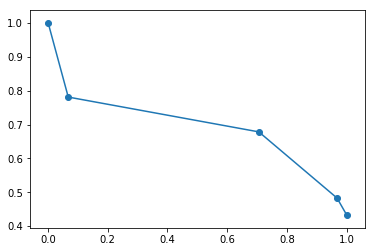

In [8]:
def print_precision_recall_curve_for_length_baseline(data_file):
    words, labels = load_file(training_file)
    max_len = max([len(w) for w in words])
    fst, pret, rect = get_length_performance(data_file,max_len)
    y = [pret[1],pret[4],pret[7],pret[12],pret[19]]
    x = [rect[1],rect[4],rect[7],rect[12],rect[19]]
    plt.plot(x,y)
    plt.scatter(x,y)
    plt.show()
    
print_precision_recall_curve_for_length_baseline(training_file)


As expected, Precision and Recall are inversely related. Recall = 1.0  means that we don't miss any complex word, but it also implies a large amount of flase positive classification. On the other hand, precision = 1.0 also implies a large amount of false positive classification. The threshold  we found is a good balance between them. 

### 1.2.3 Word Frequency Baseline

Our final baseline is a classifier similar to the last one, but thresholds on word frequency instead of length. We'll use  Google NGram frequencies to implement the function word_frequency_threshold(training_file, development_file, counts), where counts is the dictionary of word frequencies.The function returns the precision, recall, and fscore for your best threshold’s performance on both the training and development data. The thresholds are taken from the set $\{2^i : 0 \leq i \leq 36 \}$


In [9]:
## Loads Google NGram counts
def load_ngram_counts(ngram_counts_file): 
   counts = defaultdict(int) 
   with gzip.open(ngram_counts_file, 'rt', errors='ignore') as f: 
       for line in f:
           token, count = line.strip().split('\t') 
           if token[0].islower(): 
               counts[token] = int(count) 
   return counts

def frequency_baseline(i, words, counts):
    ty_pred = []
    for j in range(len(words)):
        if counts[words[j]] < i:
            ty_pred.append(1)
        else:
            ty_pred.append(0)
    return ty_pred

def get_freq_performance(data_file, counts):
    words, y_true = load_file(data_file)
    fscores = []
    precisions =[]
    recalls = []
    thresholds = [pow(2,i) for i in range(36)]
    for i in thresholds:
        y_pred = frequency_baseline(i, words, counts)
        fscore_i = get_fscore(y_pred, y_true)
        precision_i = get_precision(y_pred, y_true)
        recall_i = get_recall(y_pred,y_true)
        fscores.append(fscore_i)
        precisions.append(precision_i)
        recalls.append(recall_i)
    return fscores,precisions,recalls

def word_frequency_threshold(training_file, development_file, counts):
    fst, pret, rect = get_freq_performance(training_file,counts)
    fsd, pred, recd = get_freq_performance(development_file, counts)
    best_train = fst.index(max(fst))
    best_dev = fsd.index(max(fsd))

    print("the best threshold for the train is: " + str(pow(2,best_train)))
    print("the best threshold for the dev is: "+ str(pow(2,best_dev)))

    training_performance = [pret[best_train], rect[best_train], fst[best_train]]
    development_performance = [pred[best_dev], recd[best_dev], fsd[best_dev]]
    return training_performance, development_performance


ngram_counts = load_ngram_counts(counts_file)
results = word_frequency_threshold(training_file,development_file,ngram_counts)
print_results(results)

the best threshold for the train is: 16777216
the best threshold for the dev is: 16777216
--------------------------------------------------training results--------------------------------------------------
precision=0.5736597720557197, recall = 0.7850953206239168, fscore = 0.6629268292682927
--------------------------------------------------dev results--------------------------------------------------
precision=0.5681444991789819, recall = 0.8277511961722488, fscore = 0.6738072054527751


And now, we'll plot the Precision-Recall curve.

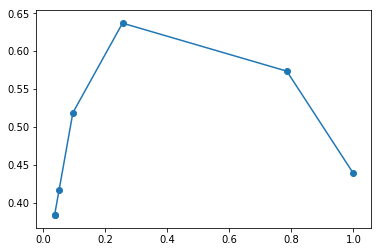

In [10]:

def print_precision_recall_curve_for_freq_baseline(data_file, counts):
    fst, pret, rect = get_freq_performance(data_file, counts)
    y = [pret[28], pret[24] ,pret[20], pret[17] , pret[14], pret[8], pret[2]]
    x = [rect[28], rect[24] ,rect[20], rect[17], rect[14], rect[8], rect[2]]
    plt.plot(x,y)
    plt.scatter(x,y)
    plt.show()


print_precision_recall_curve_for_freq_baseline(training_file, ngram_counts)


Unlike the previous case, now the precision and recall are not inversely related. For some thresholds we have low precision and recall. A possible explanation is that there is no strong correlation between the frequency and the complexity of the word.

## Q1.3. Classifiers 

### 1.3.1 Naive Bayes classification

We will use the built-in Naive Bayes model from sklearn, to train a classifier. We implement the function naive_bayes(training_file, development_file, counts). This function will train a Naive Bayes classifier on the training data using word length and word frequency as features, and it returns the precision, recall, and f-score on the training data and the development data.

In [11]:
def get_normlization_constants(counts, words):
    lens = [len(w) for w in words]
    m_len = np.mean(lens)
    s_len = np.std(lens)
    freqs = [counts[w] for w in words]
    m_freq = np.mean(freqs)
    s_freq = np.std(freqs)
    return m_len,s_len,m_freq,s_freq


def create_matrix(counts, words, m_len, s_len, m_freq, s_freq):
    m = len(words)
    w = words[0]
    length = len(w)
    freq = counts[w]
    X = np.array([((length-m_len)/s_len), ((freq-m_freq)/s_freq)])
    i = 1
    while i < m:
        w = words[i]
        length = len(w)
        freq = counts[w]
        X = np.vstack([X, [((length-m_len)/s_len), ((freq-m_freq)/s_freq)]])
        i += 1
    return X

def naive_bayes(training_file, development_file, counts):
    words, Y_true = load_file(training_file)

    m_len,s_len,m_freq,s_freq = get_normlization_constants(counts, words)

    X_train = create_matrix(counts, words,m_len,s_len,m_freq,s_freq)
    clf = GaussianNB()
    clf.fit(X_train, Y_true)
    Y_pred = clf.predict(X_train)
    tprecision = get_precision(Y_pred,Y_true)
    trecall = get_recall(Y_pred, Y_true)
    tfscore = get_fscore(Y_pred, Y_true)


    dev_words, dev_labels = load_file(development_file)
    X_dev = create_matrix(counts,dev_words, m_len,s_len,m_freq,s_freq)
    Y_pred_dev = clf.predict(X_dev)
    dprecision = get_precision(Y_pred_dev,dev_labels)
    drecall = get_recall(Y_pred_dev, dev_labels)
    dfscore = get_fscore(Y_pred_dev, dev_labels)
    training_performance = [tprecision, trecall, tfscore]
    development_performance = [dprecision, drecall, dfscore]
    return training_performance,development_performance




performance = naive_bayes(training_file,development_file,ngram_counts)
print_results(performance)

--------------------------------------------------training results--------------------------------------------------
precision=0.4950379451255108, recall = 0.9797804737146159, fscore = 0.6577467519875897
--------------------------------------------------dev results--------------------------------------------------
precision=0.46929316338354576, recall = 0.9688995215311005, fscore = 0.6323185011709602


As we can see, We got a worse results than in the baseline classifiers. There are two explanations for these results: 
1. As we have already seen, frequency is not a good feature of word complexity.
2. The Naive Bayes assumption (dfeatures are conditionally independent) is very inaccurate.



## Q1.4. Ambiguity

Now, we would like to check if the classification of a word sensitive to its context in a sentence?

we implement the function find_ambiguity(data_file) that lists context-sensitive words in the dataset. 

In [12]:
def find_ambiguity(data_file):
    words, labels = load_file(data_file)
    amb_words = []
    for w in words:
        indices = [i for i, x in enumerate(words) if x == w]
        w_labels = []
        for i in indices:
          w_labels.append(labels[i])
        if 1 in w_labels and 0 in w_labels:
            amb_words.append(w)

    print(set(amb_words))
    
    
find_ambiguity(training_file)

{'league', 'commissioner', 'district', 'indy', 'hoverboard', 'slavery', 'opponents', 'element', 'sprouts', 'campaign', 'inspired'}


As we can see in the list above, there are words that are both simple and complex in the training data. 
For example, let's look at two different occurrences of the word 'league' that were tagged with different labels:

1. league	1	4	"Tom Brady has been an NFL golden boy , with movie-star looks, a supermodel wife, four Super Bowl championship rings, and a regular-guy-makes-good back story -- he went from being a sixth-round draft pick to one of the greatest quarterbacks in league history. "



2. League	0	0	"One piece of that market , e-sport multiplayer video-gaming competitions, is expected to bring in 612$  million this year for games such as Dota 2 and League of Legends." 

As we can see, In the fisrt example, The word league appears in itself. In the second case, it is a part of a video-game nmae. 
